In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold

In [231]:
df_train = pd.read_csv('Data Train.csv')
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [232]:
df_train.shape

(4250, 20)

In [234]:
df = pd.read_csv('Data Test.csv')
df.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [235]:
df_test = df.copy()
del df_test['id']
df_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


Melihat Informasi pada dataset

In [236]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Mengecek Nilai Kosong pada Dataset

In [237]:
df_train.isna().sum() # Cek Nilai Kosong pada dataset

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [238]:
df_test.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Tidak Terdapat Nilai Kosong pada dataset, sehingga tidak ada record yang perlu di drop atau dimanipulasi

Mengecek apakah terdapat data Duplikat pada dataset

In [239]:
df_train.duplicated().sum()# Cek Nilai Duplikat pada dataset

0

Hasil pengecekan pada dataset tidak ditemukan data yang duplikat

Tahap Selanjutnya Melihat Data Unik Pada Dataset

In [240]:
for i in range(len(df_train.columns)): # Melihat Nilai Unik pada dataset
  print(df_train.columns[i])
  print(df_train[df_train.columns[i]].unique(), "\n")

state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND'] 

account_length
[107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42  23   1 200   5 178

Dataset terdapat column yang memiliki type string perlu ditangani lebih lanjut dengan melakukan encoding data pada column yang memiliki tipe data string

In [241]:
#Column Area_code
df_train['area_code'].replace(['area_code_415','area_code_408','area_code_510'] , [0,1,2], inplace = True)
df_test['area_code'].replace(['area_code_415','area_code_408','area_code_510'] , [0,1,2], inplace = True)

In [242]:
#International_Plan
df_train['international_plan'].replace(['yes', 'no'], [1,0], inplace = True)
df_test['international_plan'].replace(['yes', 'no'], [1,0], inplace = True)

#Voice Mail Plan
df_train['voice_mail_plan'].replace(['yes', 'no'], [1,0], inplace = True)
df_test['voice_mail_plan'].replace(['yes', 'no'], [1,0], inplace = True)

# Churn
df_train['churn'].replace(['yes', 'no'], [1,0], inplace = True)


In [243]:
df_train['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [244]:
categorical = ['area_code', 'international_plan','voice_mail_plan']

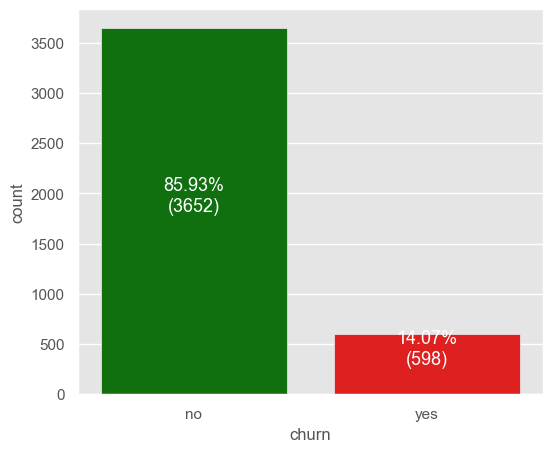

In [245]:
target_count = df_train['churn'].value_counts()
death_color = ['green', 'red']
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=df_train, x='churn', palette=death_color)
    for name , val in zip(target_count.index, target_count.values):
        plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
                color='white', fontdict={'fontsize':13})
    plt.xticks(ticks=target_count.index, labels=['no', 'yes'])
    plt.show()

In [246]:
pd.crosstab(df_train["state"], df_train["churn"]).T


state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
0,57,88,60,70,29,71,73,64,67,67,...,64,67,79,85,95,76,62,87,120,85
1,4,13,11,7,10,9,15,8,13,9,...,11,12,19,12,5,10,18,7,19,10


In [247]:
df_train.groupby(["state"])["churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

state,NJ,CA,WA,MD,MT,OK,NV,SC,TX,MS,...,AZ,ND,NC,IL,WI,RI,NE,AK,HI,VA
mean,0.270833,0.25641,0.225,0.22093,0.2125,0.205128,0.204819,0.194444,0.193878,0.182927,...,0.090909,0.089552,0.0875,0.075949,0.074468,0.068966,0.068493,0.065574,0.051948,0.05


In [253]:
#Column State
df_train['state'].replace(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VA',
 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH', 'AK', 'GA', 'MD', 'AR', 'WI', 'OR',
 'MI', 'DE', 'UT', 'CA', 'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME',
'MS', 'AL', 'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], [0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,
45 ,46 ,47 ,48 ,49 ,50], inplace =  True)

df_test['state'].replace(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VA',
 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH', 'AK', 'GA', 'MD', 'AR', 'WI', 'OR',
 'MI', 'DE', 'UT', 'CA', 'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME',
'MS', 'AL', 'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], [0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,
45 ,46 ,47 ,48 ,49 ,50], inplace =  True)

Berdasarkan Hasil pengamatan, terlihat bahwa tingkat churn di New Jersey dan California berada di atas 25% dan kurang dari 6% untuk Hawaii dan Alaska. Namun, kesimpulan ini didasarkan pada contoh yang terlalu sedikit, dan pengamatan kita mungkin hanyalah sebuah karakteristik khusus dari dataset kita.

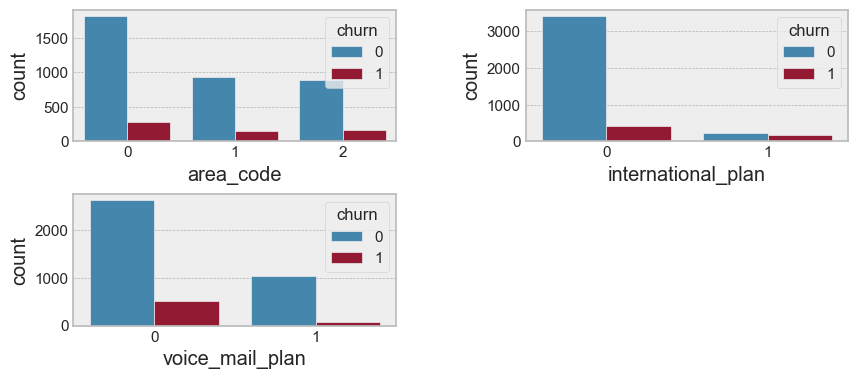

In [248]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 40))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, categorical)):
        plt.subplot(17, 2, i+1)
        sns.countplot(data=df_train, x=name, hue='churn')
#1 :good
#0 : bad

Memindahkan column churn ke dalam variabel Label

In [249]:
label = df_train.churn
#df_train = df_train.drop('churn', axis=1)

In [250]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [251]:
numeric = ['voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']
len(numeric)

15

0       1
1       0
2       0
3       0
4       1
       ..
4245    0
4246    0
4247    0
4248    1
4249    1
Name: voice_mail_plan, Length: 4250, dtype: int64
0       26
1        0
2        0
3        0
4       24
        ..
4245     0
4246     0
4247     0
4248    40
4249    34
Name: number_vmail_messages, Length: 4250, dtype: int64
0       161.6
1       243.4
2       299.4
3       166.7
4       218.2
        ...  
4245    188.3
4246    177.9
4247    170.7
4248    235.7
4249    129.4
Name: total_day_minutes, Length: 4250, dtype: float64
0       123
1       114
2        71
3       113
4        88
       ... 
4245     70
4246     89
4247    101
4248    127
4249    102
Name: total_day_calls, Length: 4250, dtype: int64
0       27.47
1       41.38
2       50.90
3       28.34
4       37.09
        ...  
4245    32.01
4246    30.24
4247    29.02
4248    40.07
4249    22.00
Name: total_day_charge, Length: 4250, dtype: float64
0       195.5
1       121.2
2        61.9
3       148.3
4       34

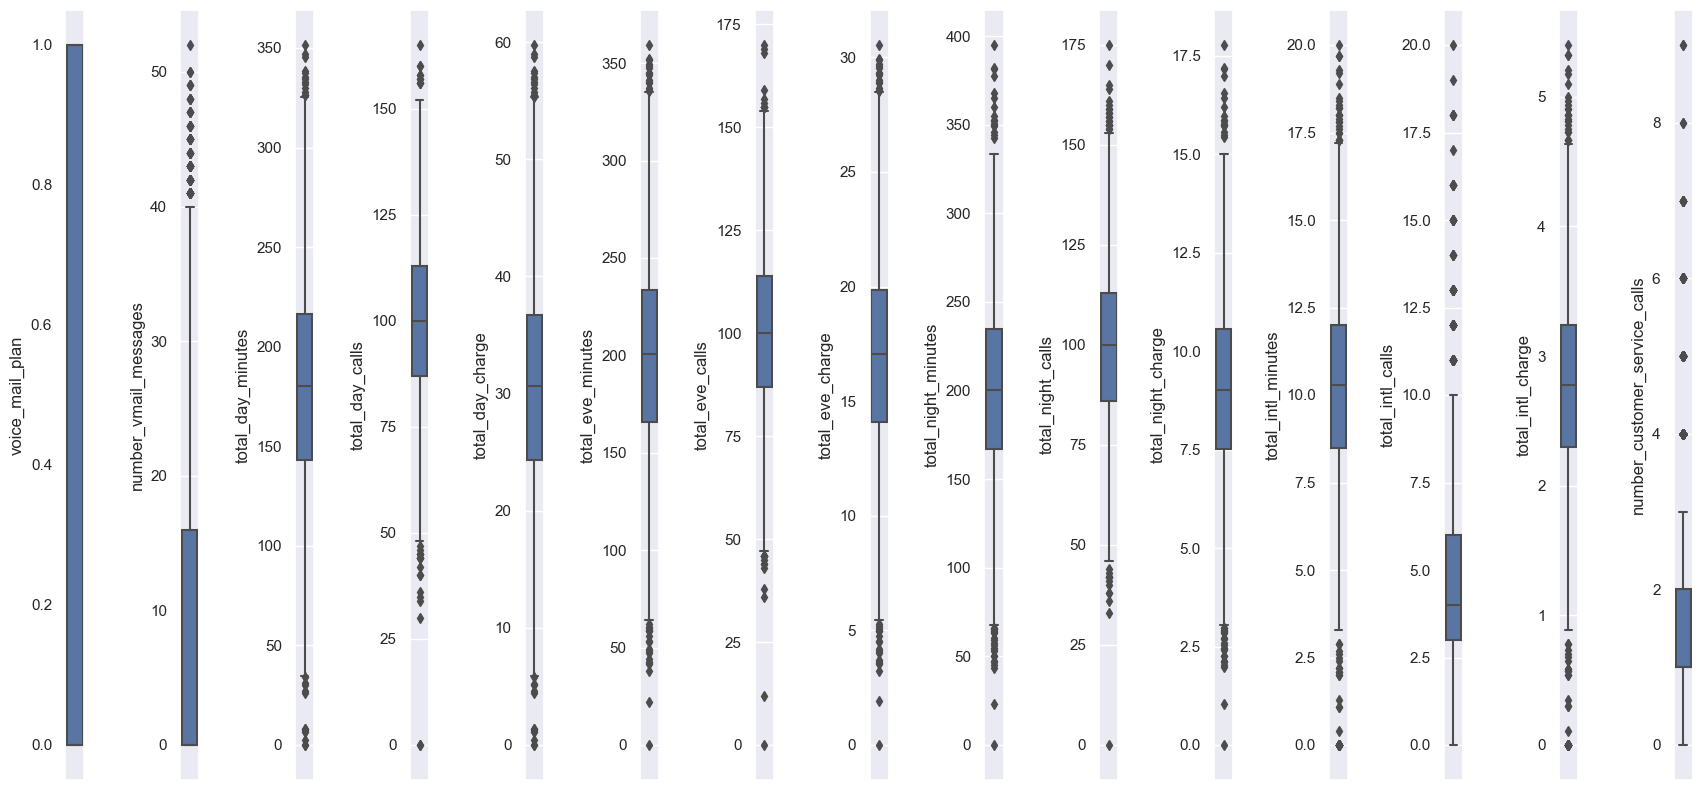

In [254]:

sns.set(rc={'figure.figsize':(21,10)})
f, axes = plt.subplots(1, len(numeric))
column= numeric
for i in range(len(numeric)):
  print(df_train[column[i]])
  sns.boxplot(y = df_train[column[i]], ax=axes[i])
plt.subplots_adjust(wspace=5)

In [255]:
def interquartile(data,x):
  qua1 = (data[x]).quantile(0.25)
  qua3 = (data[x]).quantile(0.75)
  iqr = qua3 - qua1 
  maximum = qua3+(1.5*iqr)
  minimum = qua1+(1.5*iqr)
  return maximum, minimum

In [256]:
def replace_outliers(data,x,maximum,minimum):
  more = (data[x]>maximum)
  less = (data[x]<minimum)
  print('more: ',more,' less: ',less)
  data[x] = data[x].mask(more, maximum, axis = 0)
  data[x] = data[x].mask(more, maximum, axis = 0)
  return data

more:  0       False
1       False
2       False
3       False
4       False
        ...  
4245    False
4246    False
4247    False
4248    False
4249    False
Name: voice_mail_plan, Length: 4250, dtype: bool  less:  0       True
1       True
2       True
3       True
4       True
        ... 
4245    True
4246    True
4247    True
4248    True
4249    True
Name: voice_mail_plan, Length: 4250, dtype: bool
more:  0       False
1       False
2       False
3       False
4       False
        ...  
4245    False
4246    False
4247    False
4248    False
4249    False
Name: number_vmail_messages, Length: 4250, dtype: bool  less:  0       False
1        True
2        True
3        True
4       False
        ...  
4245     True
4246     True
4247     True
4248    False
4249    False
Name: number_vmail_messages, Length: 4250, dtype: bool
more:  0       False
1       False
2       False
3       False
4       False
        ...  
4245    False
4246    False
4247    False
4248    False
4249    Fa

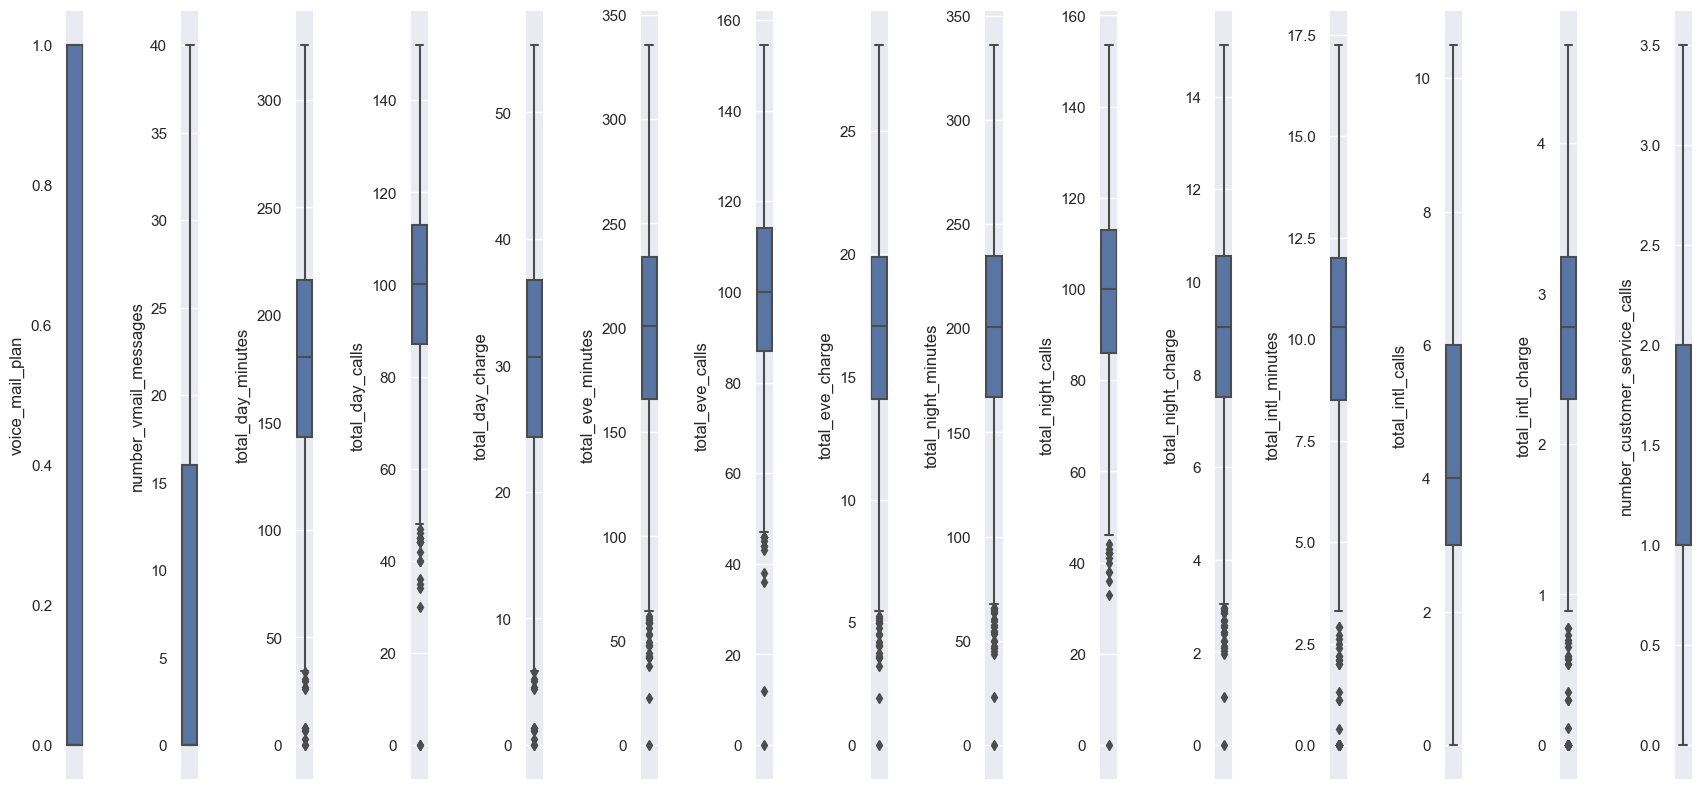

In [257]:
var = numeric
for i in range(len(var)):
  maximum,minimum = interquartile(df_train,var[i])
  df_train = replace_outliers (df_train,var[i],maximum,minimum)

sns.set(rc={'figure.figsize':(21,10)})
f,axes = plt.subplots(1,len(numeric))

for i in range(len(var)):
  sns.boxplot(y= df_train[var[i]], ax= axes[i])
plt.subplots_adjust(wspace=5)

In [258]:
def corr_for_target(df, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(df.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

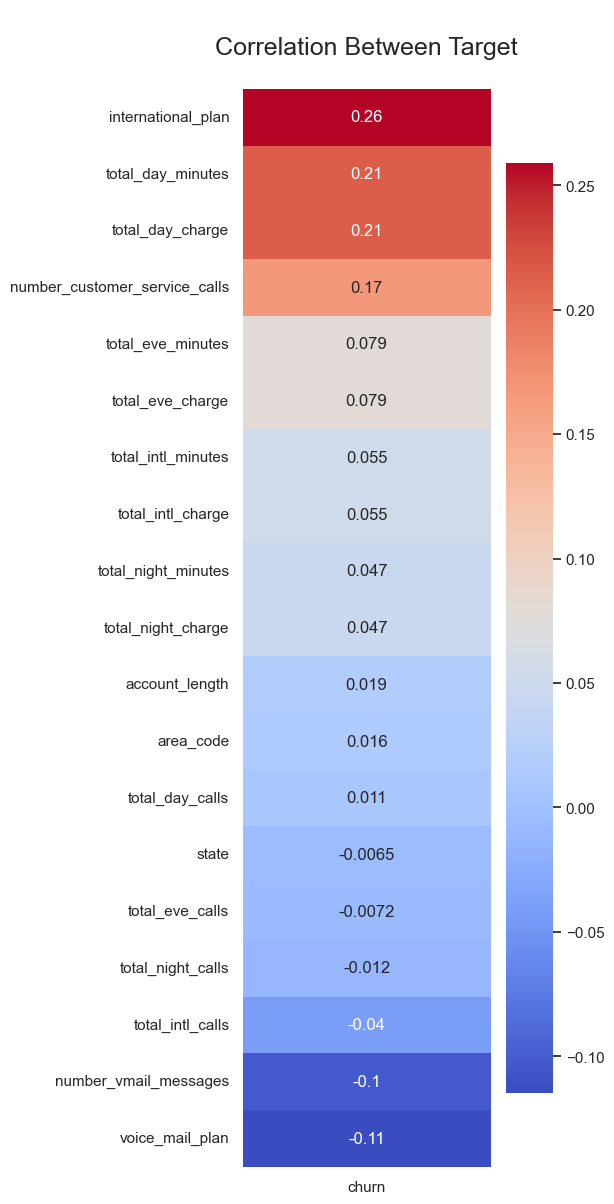

In [259]:
corr_for_target(df_train, 'churn', 'Correlation Between Target')

In [260]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,107,0,0,1,26.0,161.6,123.0,27.47,195.50,103.0,16.620,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
1,1,137,0,0,0,0.0,243.4,114.0,41.38,121.20,110.0,10.300,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
2,0,84,1,1,0,0.0,299.4,71.0,50.90,61.90,88.0,5.260,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
3,2,75,0,1,0,0.0,166.7,113.0,28.34,148.30,122.0,12.610,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0
4,3,121,2,0,1,24.0,218.2,88.0,37.09,335.55,108.0,28.515,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,10,83,0,0,0,0.0,188.3,70.0,32.01,243.80,88.0,20.720,213.7,79.0,9.62,10.3,6.0,2.78,0.0,0
4246,6,73,1,0,0,0.0,177.9,89.0,30.24,131.20,82.0,11.150,186.2,89.0,8.38,11.5,6.0,3.11,3.0,0
4247,33,75,1,0,0,0.0,170.7,101.0,29.02,193.10,126.0,16.410,129.1,104.0,5.81,6.9,7.0,1.86,1.0,0
4248,20,50,1,0,1,40.0,235.7,127.0,40.07,223.00,126.0,18.960,297.5,116.0,13.39,9.9,5.0,2.67,2.0,0


In [261]:
df_train = df_train.drop(['churn'], axis=1)

In [262]:
label.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [263]:
smt = SMOTE()
df_train, y_train = smt.fit_resample(df_train, label)

In [264]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,107,0,0,1,26.0,161.600000,123.000000,27.470000,195.500000,103.000000,16.620000,254.400000,103.000000,11.450000,13.700000,3.000000,3.700000,1.000000
1,1,137,0,0,0,0.0,243.400000,114.000000,41.380000,121.200000,110.000000,10.300000,162.600000,104.000000,7.320000,12.200000,5.000000,3.290000,0.000000
2,0,84,1,1,0,0.0,299.400000,71.000000,50.900000,61.900000,88.000000,5.260000,196.900000,89.000000,8.860000,6.600000,7.000000,1.780000,2.000000
3,2,75,0,1,0,0.0,166.700000,113.000000,28.340000,148.300000,122.000000,12.610000,186.900000,121.000000,8.410000,10.100000,3.000000,2.730000,3.000000
4,3,121,2,0,1,24.0,218.200000,88.000000,37.090000,335.550000,108.000000,28.515000,212.600000,118.000000,9.570000,7.500000,7.000000,2.030000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,11,12,0,0,0,0.0,150.108885,111.875601,25.522851,242.052944,86.576823,20.578160,311.502776,102.506109,14.017316,10.980118,4.020733,2.962292,1.020733
7300,34,158,1,0,0,0.0,293.235062,135.027431,49.851835,207.523316,128.684954,17.643317,161.218862,113.950706,7.251779,10.564381,3.063009,2.850712,0.265752
7301,39,84,1,0,0,0.0,97.901242,104.037497,16.642909,211.513305,119.207138,17.978688,224.920895,119.264287,10.124723,8.352857,3.867856,2.254536,1.707590
7302,19,127,0,0,0,0.0,270.212635,106.634823,45.939831,231.402775,107.665644,19.672188,251.913556,111.078586,11.339245,10.004777,7.047765,2.704607,1.317412


In [265]:

X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.3)

In [266]:
# Standardize our Data - Feature Scaling Min-Max scale 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

#assign scaler to column:
data_scaled_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
data_scaled_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [267]:
data_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)


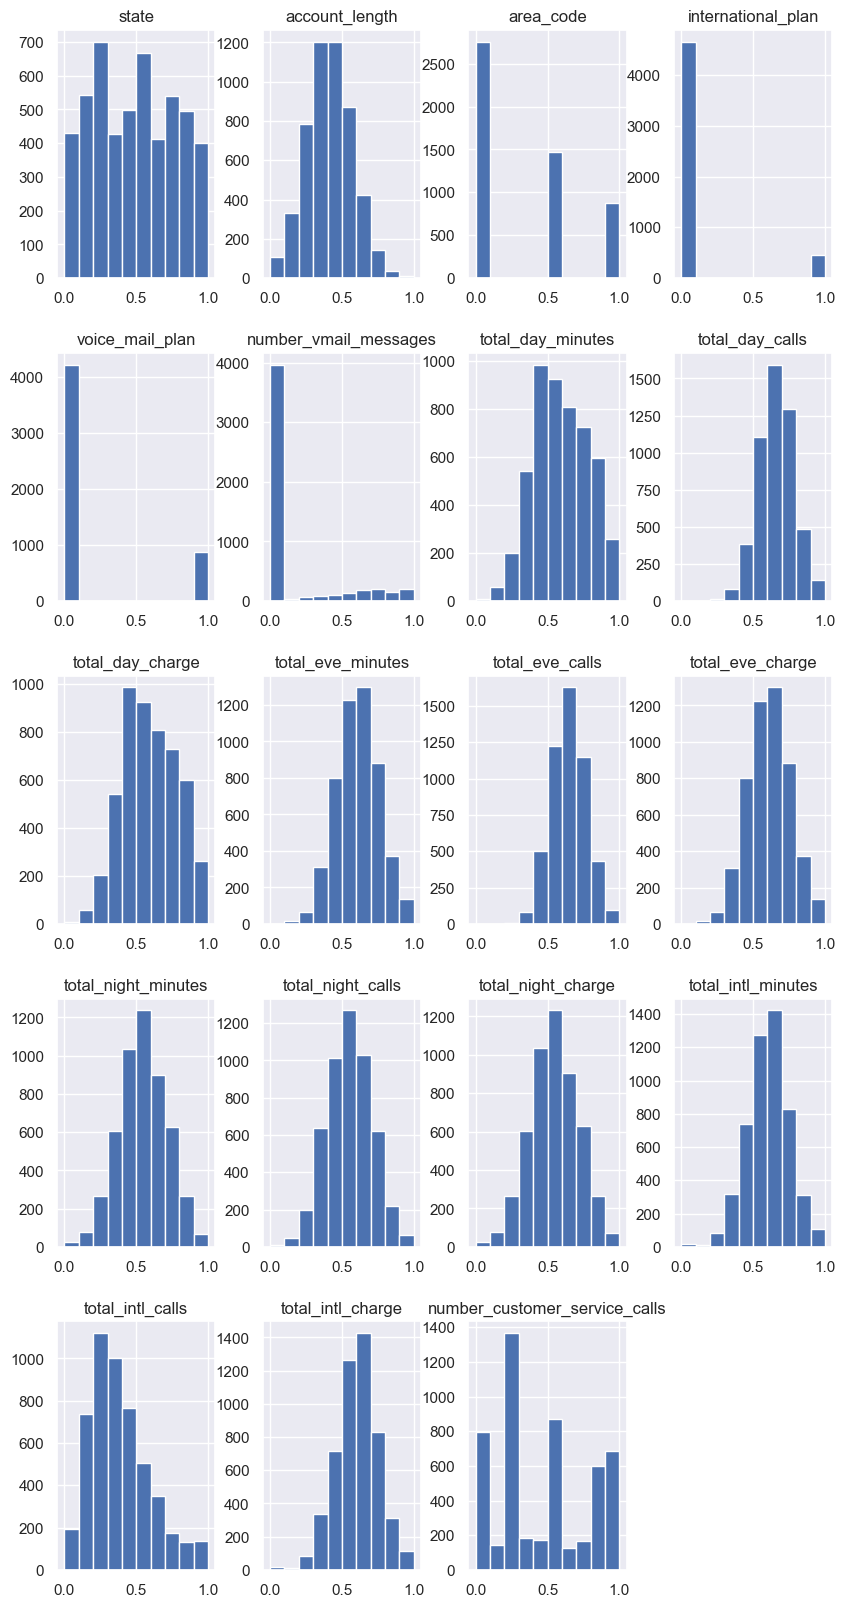

In [268]:
pd.DataFrame(data_scaled_train, columns=data_scaled_train.columns).hist(figsize=(10, 20))
plt.show()

In [269]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC rbf', SVC(kernel='rbf')))

In [271]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, data_scaled_train, y_train, cv = 10, scoring='f1')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.9559826303840596
Mean of the KNN model scores : 0.8537809018042293
Mean of the Decision Tree Clas. model scores : 0.9301722052071758
Mean of the GBC model scores : 0.954286595827219
Mean of the Logistic Reg. model scores : 0.7621930461703414
Mean of the XGB model scores : 0.9745603191646834
Mean of the SVC rbf model scores : 0.8521309941627134


In [117]:
from sklearn.metrics import accuracy_score,f1_score
import time
from zoofs.baseoptimizationalgorithm import BaseOptimizationAlgorithm
weight_score_global = 0.8
X_train, X_valid, y_train1, y_valid = train_test_split(data_scaled_train, y_train, test_size=0.3,random_state=32)


In [91]:
class ParticleSwarmOptimization(BaseOptimizationAlgorithm):
    def __init__(self,
                 objective_function,
                 n_iteration: int = 20,
                 timeout: int = None,
                 population_size=50,
                 minimize=True,
                 c1=2,
                 c2=2,
                 w=0.9,
                 logger=None,
                 **kwargs):
        """       
        Parameters
        ----------
        objective_function: user made function of the signature 'func(model,X_train,y_train,X_test,y_test)'
            User defined function that returns the objective value 
        population_size: int, default=50
            Total size of the population , default=50
        n_iteration: int, default=20
            Number of time the Particle Swarm Optimization algorithm will run
        timeout: int = None
            Stop operation after the given number of second(s).
            If this argument is set to None, the operation is executed without time limitation and n_iteration is followed
        minimize : bool, default=True
            Defines if the objective value is to be maximized or minimized
        c1: float, default=2.0
            First acceleration constant used in particle swarm optimization
        c2: float, default=2.0
            Second acceleration constant used in particle swarm optimization
        w: float, default=0.9
            Velocity weight factor
        logger: Logger or None, optional (default=None)
            - accepts `logging.Logger` instance.
        **kwargs
            Any extra keyword argument for objective_function
        Attributes
        ----------
        best_feature_list : ndarray of shape (n_features)
            list of features with the best result of the entire run
        """
        super().__init__(objective_function, n_iteration, timeout, population_size, minimize, logger, **kwargs)
        self.c1 = c1
        self.c2 = c2
        self.w = w

    def _evaluate_fitness(self, model, X_train, y_train, X_valid, y_valid, particle_swarm_flag=0, dragon_fly_flag=0):
        scores = []
        for i, individual in enumerate(self.individuals):
            chosen_features = [index for index in range(
                X_train.shape[1]) if individual[index] == 1]
            x_train_copy = X_train.iloc[:, chosen_features]
            x_valid_copy = X_valid.iloc[:, chosen_features]

            feature_hash = '_*_'.join(
                sorted(self.feature_list[chosen_features]))
            if feature_hash in self.feature_score_hash.keys():
                score = self.feature_score_hash[feature_hash]
            else:
                score = self.objective_function(
                    model, x_train_copy, y_train, x_valid_copy, y_valid, **self.kwargs)
                if not (self.minimize):
                    score = -score

                weight_score = weight_score_global
                total_feat = X_train.shape[1]
                len_cf = len(chosen_features)
                score_cf = 1 - (len_cf / total_feat)
                weight_cf = 1 - weight_score
                final_score = (weight_score * score) + (weight_cf * score_cf)
                self.feature_score_hash[feature_hash] = final_score



            if score < self.best_score:
                self.best_score = score
                self.best_dim = individual
                self.best_score_dimension = individual
            if particle_swarm_flag:
                if score < self.current_best_scores[i]:
                    self.current_best_scores[i] = score
                    self.current_best_individual_score_dimensions[i] = individual
            if dragon_fly_flag:
                if score > self.worst_score:
                    self.worst_score = score
                    self.worst_dim = individual
            scores.append(score)
        return scores

    

    def fit(self, model, X_train, y_train, X_valid, y_valid, verbose=True):
        """
        Parameters
        ----------   
        model: machine learning model's object
            The object to be used for fitting on train data
        X_train: pandas.core.frame.DataFrame of shape (n_samples, n_features)
            Training input samples to be used for machine learning model
        y_train: pandas.core.frame.DataFrame or pandas.core.series.Series of shape (n_samples)
            The target values (class labels in classification, real numbers in
            regression).
        X_valid: pandas.core.frame.DataFrame of shape (n_samples, n_features)
            Validation input samples
        y_valid: pandas.core.frame.DataFrame or pandas.core.series.Series of shape (n_samples)
            The target values (class labels in classification, real numbers in
            regression).
        verbose : bool,default=True
            Print results for iterations
        """
        self._check_params(model, X_train, y_train, X_valid, y_valid)

        self.feature_score_hash = {}
        self.feature_list = np.array(list(X_train.columns))
        self.best_results_per_iteration = {}
        self.best_score = np.inf
        self.best_dim = np.ones(X_train.shape[1])

        self.initialize_population(X_train)

        self.current_best_individual_score_dimensions = self.individuals
        self.current_best_scores = [np.inf]*self.population_size
        self.gbest_individual = self.best_dim
        self.v = np.zeros((self.population_size, X_train.shape[1]))

        if (self.timeout is not None):
            timeout_upper_limit = time.time() + self.timeout
        else:
            timeout_upper_limit = time.time()
        for i in range(self.n_iteration):

            if (self.timeout is not None) & (time.time() > timeout_upper_limit):
                warnings.warn("Timeout occured")
                break

            # Logging warning if any entity in the population ends up having zero selected features
            self._check_individuals()

            self.fitness_scores = self._evaluate_fitness(
                model, X_train, y_train, X_valid, y_valid, 1, 0)

            self.gbest_individual = self.best_dim

            self.iteration_objective_score_monitor(i)

            r1 = np.random.random((self.population_size, X_train.shape[1]))
            r2 = np.random.random((self.population_size, X_train.shape[1]))

            self.v = self.w*self.v+self.c1*r1*(self.gbest_individual-self.individuals) +\
                self.c2*r2 * \
                (self.current_best_individual_score_dimensions-self.individuals)
            self.v = np.where(self.v > 6, 6, self.v)
            self.v = np.where(self.v < -6, -6, self.v)
            self.s_v = self.sigmoid(self.v)
            self.individuals = np.where(np.random.uniform(
                size=(self.population_size, X_train.shape[1])) < self.s_v, 1, 0)

            self.verbose_results(verbose, i)

            self.best_feature_list = list(
                self.feature_list[np.where(self.best_dim)[0]])
        return self.best_feature_list



In [97]:
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value !
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
  P = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
  P = np.average(P)
  model.fit(X_train,y_train)  
  #P=f1_score(y_valid,model.predict(X_valid))
  #model.fit(X_train,y_train)  
  #P=f1_score(y_valid,model.predict(X_valid))
  return P

In [118]:
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=20,
                                       population_size=20,minimize=False)

In [102]:
clf = XGBClassifier()

In [119]:
# fit the algorithm
algo_object.fit(clf,X_train, y_train1, X_valid, y_valid,verbose=True)

 [ 2023-05-24 14:16:26,815 ] Finished iteration #0 with objective value 0.9621555308582362. Current best value is 0.9621555308582362 
 [ 2023-05-24 14:17:17,590 ] Finished iteration #1 with objective value 0.9460809386920446. Current best value is 0.9621555308582362 
 [ 2023-05-24 14:18:09,774 ] Finished iteration #2 with objective value 0.9616661247460081. Current best value is 0.9621555308582362 
 [ 2023-05-24 14:18:59,953 ] Finished iteration #3 with objective value 0.9659350817822272. Current best value is 0.9659350817822272 
 [ 2023-05-24 14:20:03,041 ] Finished iteration #4 with objective value 0.964165618303318. Current best value is 0.9659350817822272 
 [ 2023-05-24 14:21:06,301 ] Finished iteration #5 with objective value 0.9639166587730437. Current best value is 0.9659350817822272 
 [ 2023-05-24 14:22:10,869 ] Finished iteration #6 with objective value 0.9656476144502282. Current best value is 0.9659350817822272 
 [ 2023-05-24 14:23:15,381 ] Finished iteration #7 with objecti

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [120]:
algo_object.plot_history()

In [313]:
algo_object.best_feature_list

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [272]:
data_train_new = data_scaled_train[algo_object.best_feature_list]
data_tes_new = data_scaled_test[algo_object.best_feature_list]

In [273]:
data_test = data_test[algo_object.best_feature_list]

In [274]:
rf = XGBClassifier()
rf.fit(data_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [204]:
param_grid_= {
'colsample_bytree' : [0.5, 1.0],
'gamma' : [0, 0.1, 1],
'learning_rate' : [0.05, 0.08, 0.1],
'min_child_weight' : [5, 10, 20],
'scale_pos_weight' : [2, 4, 6],
'subsample' : [ 0.8, 0.9, 1.0],
'n_estimators' : [50, 100, 150],
'max_depth' : [20, 40, 100]
}
xgb_cv = GridSearchCV(rf, param_grid_, scoring='f1', n_jobs=-1, cv=10, verbose=1)
xgb_cv.fit(data_train_new, y_train)

Fitting 10 folds for each of 4374 candidates, totalling 43740 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0], 'gamma': [0, 0.1, 1],
                         'learning_rate': [0.05, 0.08, 0.1],
                         'max_depth': [20, 40, 100],
                         'min_child_weight': [5, 10, 20],
                         'n_estimators': [50, 100, 150],
                         'scale_pos_weight': [2, 4, 6],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1', verbose=1)

In [206]:
xgb_cv.best_score_

0.97124494473433

In [339]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 20,
 'min_child_weight': 5,
 'n_estimators': 150,
 'scale_pos_weight': 2,
 'subsample': 1.0}

In [299]:
best_result = rf.fit(data_train_new, y_train)

In [280]:
P = cross_val_score(rf, data_train_new, y_train, cv=10, scoring='f1')
P = np.average(P)
print(P)

0.9747721794125118


In [300]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
# model evaluation for training set
y_train_predict = best_result.predict(data_train_new)
accuracy = accuracy_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
roc = roc_auc_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('Accuracy is {}'.format(accuracy))
print('F1 score is {}'.format(f1))
print('ROC AUC score is {}'.format(roc))
print("\n")

The model performance for training set
--------------------------------------
Accuracy is 1.0
F1 score is 1.0
ROC AUC score is 1.0




In [301]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
# model evaluation for training set
y_test_predict1 = best_result.predict(data_tes_new)
accuracy = accuracy_score(y_test, y_test_predict1)
f1 = f1_score(y_test, y_test_predict1)
roc = roc_auc_score(y_test, y_test_predict1)

print("The model performance for test set")
print("--------------------------------------")
print('Accuracy is {}'.format(accuracy))
print('F1 score is {}'.format(f1))
print('ROC AUC score is {}'.format(roc))
print("\n")

The model performance for test set
--------------------------------------
Accuracy is 0.969434306569343
F1 score is 0.967927237912877
ROC AUC score is 0.969082440987621




In [302]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_test_predict1))
print(classification_report(y_test, y_test_predict1))

[[1114   25]
 [  42 1011]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1139
           1       0.98      0.96      0.97      1053

    accuracy                           0.97      2192
   macro avg       0.97      0.97      0.97      2192
weighted avg       0.97      0.97      0.97      2192



In [303]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

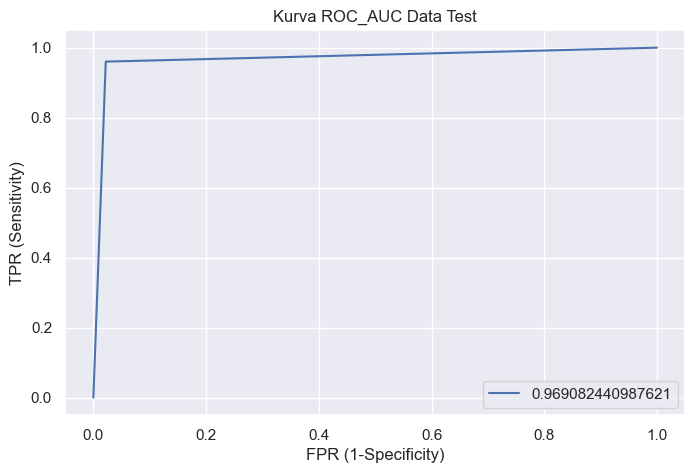

In [304]:
prob = best_result.predict(data_tes_new)
auc = roc_auc_score(y_test, prob)
fpr, tpr,_ = roc_curve(y_test, prob)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, label=str(auc))
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('Kurva ROC_AUC Data Test')
#plt.title('Kurva ROC_AUC Data Tes')
plt.legend()
plt.show()

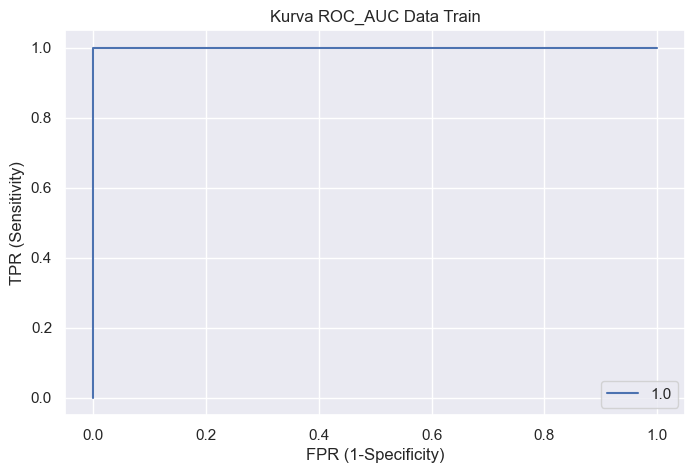

In [305]:
prob = best_result.predict(data_train_new)
auc = roc_auc_score(y_train, prob)
fpr, tpr,_ = roc_curve(y_train, prob)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, label=str(auc))
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('Kurva ROC_AUC Data Train')
#plt.title('Kurva ROC_AUC Data Tes')
plt.legend()
plt.show()

Ketika Nilai AUC Mendekati 1, pengklasifikasi dapat dengan benar membedakan antara semua titik kelas Positif dan Negatif. Namun, jika AUC adalah 0, maka classifier akan memprediksi semua Negatif sebagai Positif dan semua Positif sebagai Negatif.

In [306]:
y_test_predict1 = best_result.predict(data_test)

In [307]:
y_test = pd.DataFrame(y_test_predict1, columns = ['churn'])
horizontal_concat_data_test = pd.concat([df, y_test], axis=1)
horizontal_concat_data_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


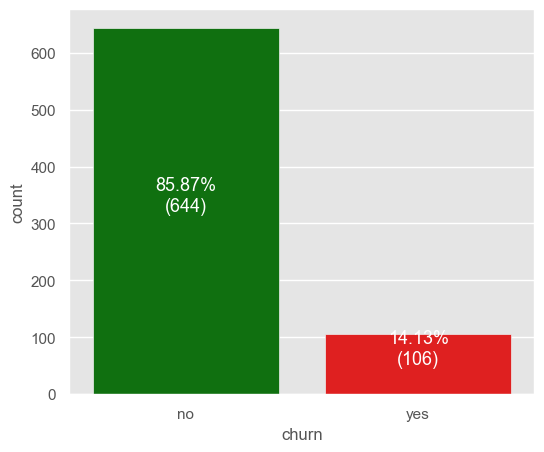

In [308]:
target_count = horizontal_concat_data_test['churn'].value_counts()
death_color = ['green', 'red']
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=horizontal_concat_data_test, x='churn', palette=death_color)
    for name , val in zip(target_count.index, target_count.values):
        plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
                color='white', fontdict={'fontsize':13})
    plt.xticks(ticks=target_count.index, labels=['no', 'yes'])
    plt.show()

In [309]:
conditions = [
    (horizontal_concat_data_test['churn']==0),
    (horizontal_concat_data_test['churn']==1)]
choices = ['no','yes']
horizontal_concat_data_test['churn'] = np.select(conditions, choices)
horizontal_concat_data_test


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,yes
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,no
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,no
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,no
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no


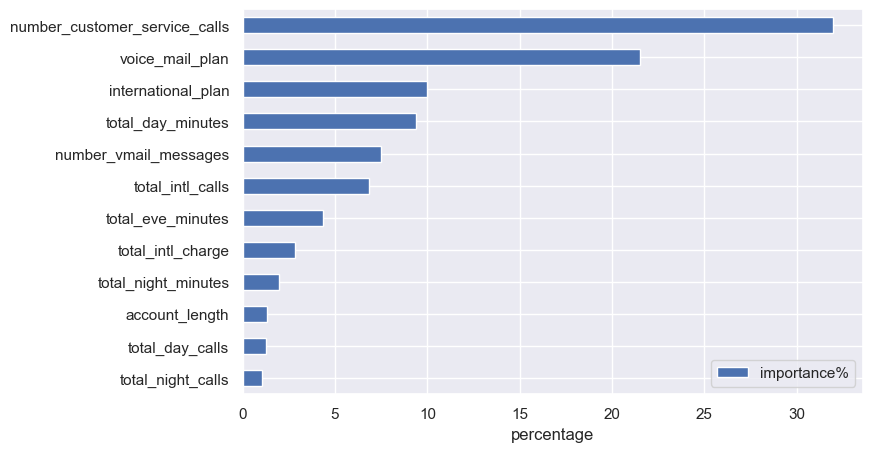

In [ ]:
feature_imp = pd.DataFrame(np.round(rf.feature_importances_*100, 2), index=data_train_new.columns, columns=['importance%'])
feature_imp = feature_imp.sort_values(by='importance%', ascending=True)
feature_imp.plot(kind='barh', figsize=(8, 5))
plt.xlabel('percentage')
plt.show()

Dalam konteks menentukan churn pelanggan (customer churn), berikut adalah penjelasan arti dari setiap fitur yang dapat digunakan dalam memprediksi churn:

1. Number_customer_service_calls: Jumlah panggilan yang dilakukan oleh pelanggan ke pusat layanan pelanggan. Fitur ini menunjukkan interaksi pelanggan dengan tim dukungan atau layanan pelanggan. Jumlah panggilan yang tinggi dapat menjadi indikator masalah atau ketidakpuasan pelanggan yang mungkin menyebabkan kecenderungan churn.

2. Voice_mail_plan: Fitur ini menunjukkan apakah pelanggan memiliki atau tidak memiliki paket voicemail. Pelanggan dengan paket voicemail mungkin lebih terlibat dengan layanan dan lebih mungkin untuk tetap bertahan. Pelanggan tanpa paket voicemail mungkin memiliki tingkat keterlibatan yang lebih rendah dan memiliki potensi churn yang lebih tinggi.

3. International_plan: Fitur ini menunjukkan apakah pelanggan memiliki paket layanan internasional atau tidak. Pelanggan dengan paket internasional mungkin memiliki kebutuhan atau preferensi komunikasi internasional yang lebih tinggi. Pelanggan yang tidak memiliki paket internasional mungkin lebih rentan untuk churn jika mereka membutuhkan layanan komunikasi internasional.

4. Total_day_minutes: Total durasi waktu bicara pelanggan selama jam-jam siang. Fitur ini mencerminkan tingkat penggunaan dan keterlibatan pelanggan dengan layanan selama periode waktu tertentu. Jika pelanggan menggunakan layanan secara intensif selama jam-jam siang, hal ini dapat menunjukkan tingkat kepuasan dan keterikatan yang tinggi, yang cenderung mengurangi risiko churn.

5. Number_vmail_messages: Jumlah pesan voicemail yang diterima oleh pelanggan. Jika pelanggan menerima banyak pesan voicemail, ini dapat menjadi indikator interaksi yang aktif dan keterlibatan pelanggan dengan layanan. Pelanggan yang aktif dalam menggunakan fitur voicemail cenderung lebih terlibat dan kurang mungkin untuk churn.

6. Total_intl_calls: Jumlah panggilan internasional yang dilakukan oleh pelanggan. Jika pelanggan melakukan panggilan internasional secara teratur, ini dapat menunjukkan kebutuhan atau preferensi komunikasi internasional yang tinggi. Tingkat panggilan internasional yang tinggi mungkin menunjukkan keterikatan pelanggan dengan layanan yang spesifik, dan mereka mungkin lebih stabil dalam menggunakan layanan tersebut.

7. Total_eve_minutes: Total durasi waktu bicara pelanggan selama jam-jam malam. Fitur ini mencerminkan tingkat penggunaan dan keterlibatan pelanggan dengan layanan selama periode waktu tertentu. Pelanggan yang menggunakan layanan secara intensif selama jam-jam malam mungkin memiliki kebutuhan atau preferensi yang spesifik. Jika pelanggan merasa puas dengan layanan yang diberikan selama periode tersebut, mereka cenderung lebih stabil dan memilki kemungkinan kecil untuk churn.

8. Total_intl_charge: Total biaya panggilan internasional yang dikenakan kepada pelanggan. Fitur ini mencerminkan biaya yang terkait dengan panggilan internasional yang dilakukan oleh pelanggan. Biaya yang tinggi atau tidak sesuai dengan harapan pelanggan dapat menyebabkan ketidakpuasan dan mempengaruhi keputusan untuk churn.

9. Total_night_minutes: Total durasi waktu bicara pelanggan selama jam-jam malam. Fitur ini mencerminkan tingkat penggunaan dan keterlibatan pelanggan dengan layanan selama periode waktu tertentu. Pelanggan yang aktif selama jam-jam malam mungkin memiliki kebutuhan atau preferensi yang spesifik. Jika pelanggan merasa puas dengan layanan yang diberikan selama periode tersebut, mereka cenderung lebih stabil dan kurang mungkin untuk churn.

10. Total_day_calls: Jumlah panggilan yang dilakukan oleh pelanggan selama jam-jam siang. Fitur ini mencerminkan tingkat interaksi pelanggan dengan layanan selama periode waktu tertentu. Jumlah panggilan yang tinggi atau rendah dapat memberikan gambaran tentang tingkat keterlibatan atau kepuasan pelanggan, yang dapat mempengaruhi keputusan untuk churn.

11. Total_night_calls: Jumlah panggilan yang dilakukan oleh pelanggan selama jam-jam malam. Fitur ini mencerminkan tingkat interaksi pelanggan dengan layanan selama periode waktu tertentu. Jumlah panggilan yang tinggi atau rendah dapat memberikan gambaran tentang tingkat keterlibatan atau kepuasan pelanggan, yang dapat mempengaruhi keputusan untuk churn.

12. Account_length: Lamanya waktu pelanggan menjadi pengguna layanan. Fitur ini mencerminkan sejauh mana pelanggan telah berlangganan layanan tersebut. Pelanggan dengan account_length yang lebih lama cenderung lebih stabil dan kurang mungkin untuk churn, sedangkan pelanggan baru atau dengan account_length yang lebih pendek mungkin memiliki risiko churn yang lebih tinggi.

Dengan menganalisis dan memperhatikan fitur-fitur ini secara detail, perusahaan dapat membangun model prediksi churn yang lebih akurat dan mengambil tindakan pencegahan yang sesuai untuk mempertahankan pelanggan yang memiliki kemungkinan churn.

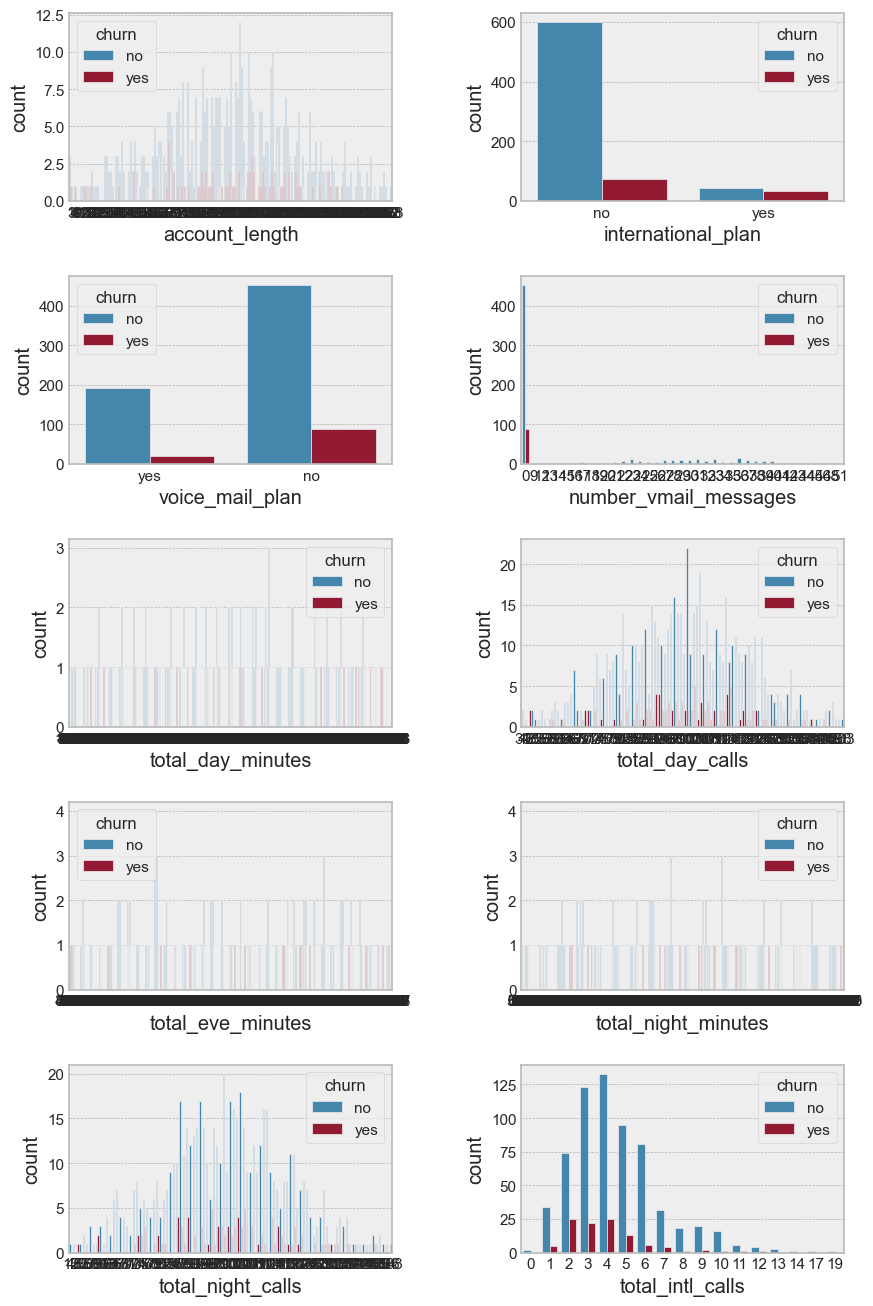

In [321]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 40))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, algo_object.best_feature_list)):
        plt.subplot(12, 2, i+1)
        sns.countplot(data=horizontal_concat_data_test, x=name, hue='churn')
#1 :good
#0 : bad

In [328]:
target= ['total_intl_charge','number_customer_service_calls']

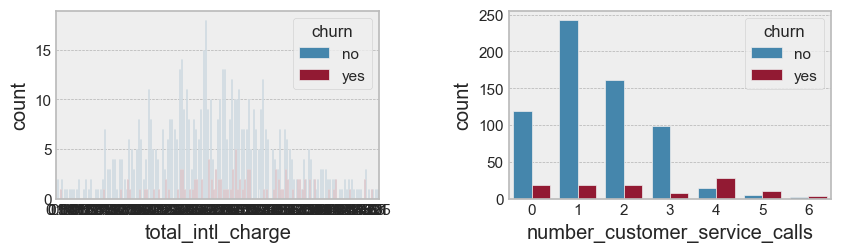

In [329]:
colors = sns.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 40))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, target)):
        plt.subplot(12, 2, i+1)
        sns.countplot(data=horizontal_concat_data_test, x=name, hue='churn')
#1 :good

Berikut adalah beberapa saran untuk mengatasi masalah churn yang terkait dengan fitur-fitur yang mempunyai hubungan yang erat akan terjadinya churn dan tidak:

1. Number_customer_service_calls:
   - Tingkatkan kualitas layanan pelanggan dengan memberikan pelatihan dan sumber daya yang cukup kepada Costumer Service.
   - Analisis panggilan layanan pelanggan yang sering terjadi untuk mengidentifikasi pola masalah dan mengambil langkah-langkah untuk memperbaikinya.
   - Mencatat umpan balik pelanggan dan memperbaiki proses bisnis yang mungkin menyebabkan panggilan layanan yang berulang.

2. Voice_mail_plan:
   - Lakukan survei kepuasan pelanggan terkait fitur voicemail dan identifikasi masalah atau kebutuhan yang mungkin ada.
   - Tingkatkan kegunaan fitur voicemail dengan menawarkan opsi personalisasi, notifikasi, dan kemudahan penggunaan.
   - Berikan pelatihan kepada pelanggan tentang cara menggunakan fitur voicemail dengan efektif.

3. International_plan:
   - Evaluasi biaya dan manfaat paket internasional yang ditawarkan dan pastikan sesuai dengan kebutuhan pelanggan.
   - Berikan informasi yang jelas tentang tarif dan opsi paket internasional kepada pelanggan.
   - Sediakan layanan pelanggan yang responsif dan dukungan teknis terkait panggilan internasional.

4. Total_day_minutes, Total_eve_minutes, Total_night_minutes:
   - Identifikasi dan tindak lanjuti dengan pelanggan yang menggunakan layanan di luar rata-rata untuk memahami kebutuhan dan kepuasan mereka.
   - Tawarkan paket atau promosi yang sesuai untuk mengoptimalkan penggunaan layanan dan meningkatkan kepuasan pelanggan.
   - Lakukan survei kepuasan pelanggan untuk memahami lebih lanjut faktor-faktor yang mempengaruhi penggunaan dan kepuasan pelanggan.

5. Number_vmail_messages:
   - Perbaiki atau tingkatkan fitur voicemail untuk meningkatkan kegunaannya dan menarik minat pelanggan.
   - Berikan panduan dan sumber daya kepada pelanggan tentang cara mengoptimalkan penggunaan fitur voicemail.
   - Tingkatkan komunikasi dengan pelanggan melalui pesan voicemail yang relevan dan berguna.

6. Total_intl_calls, Total_intl_charge:
   - Tinjau ulang tarif panggilan internasional dan bandingkan dengan pesaing di pasar.
   - Berikan paket khusus atau diskon untuk panggilan internasional yang menarik bagi pelanggan.
   - Komunikasikan tarif dan biaya internasional secara jelas kepada pelanggan untuk menghindari kejutan atau ketidakpuasan terkait tagihan.

7. Total_night_calls, Total_day_calls:
   - Analisis tren panggilan pelanggan selama jam-jam tertentu dan identifikasi faktor-faktor yang mungkin mempengaruhi interaksi pelanggan.
   - Tawarkan promosi atau fitur khusus selama jam-jam tersebut untuk meningkatkan keterlibatan pelanggan dan membangun kepuasan.

8. Account_length:
   - Fokus pada retensi pelanggan baru dengan memberikan layanan yang berkualitas tinggi dan pengalaman yang positif serta memberikan promosi paket layanan.
   - Tawarkan insentif atau program loyalitas kepada pelanggan yang telah lama berlangganan untuk memperkuat hubungan dan mendorong retensi.
   - Lakukan analisis untuk mengidentifikasi faktor-faktor yang mempengaruhi churn pada pelanggan baru dan lakukan perbaikan pada tahap awal keanggotaan.

Selain itu, penting untuk mengelola hubungan pelanggan secara proaktif, berkomunikasi secara teratur dengan mereka, dan merespons masalah atau keluhan dengan cepat agar segera diatasi.